# Heart Disease Project - Exploratory Data Analysis

In this notebook, I will perform EDA on the following Heart Disease dataset from Kaggle (https://www.kaggle.com/ronitf/heart-disease-uci). My ultimate goal will be to create a Machine Learning model to predict whether or not a patient has heart disease, given a set of information about them.

In [2]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# load data
df = pd.read_csv('heart.csv')

In [4]:
# take a quick look at the columns in the dataframe
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [6]:
# get a feel for the size and shape of the data
df.shape # 303 rows (examples), 14 columns

(303, 14)

In [7]:
# describe the data - a good way to find outliers and see the distribution / center of the features
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [8]:
# find empty cells
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [24]:
# find correlations of features with the target/label
df[df.columns[:-1]].apply(lambda x: x.corr(df['target']))
# the following values have higher correlation with the target: cp, thalach, exang, oldpeak, slope, ca, thal

age        -0.225439
sex        -0.280937
cp          0.433798
trestbps   -0.144931
chol       -0.085239
fbs        -0.028046
restecg     0.137230
thalach     0.421741
exang      -0.436757
oldpeak    -0.430696
slope       0.345877
ca         -0.391724
thal       -0.344029
dtype: float64

In [12]:
# Is my label imbalanced? 1 = no heart disease, 0 = heart disease
# I can perform this task on other features as well

df.target.value_counts()

1    165
0    138
Name: target, dtype: int64

In [13]:
# How many patients have heart disease, by sex? # Sex 0 = Female, Sex 1 = Male
# The vast majority of our positive heart disease patients are men (114/138)

df.groupby(['sex']).target.value_counts()

sex  target
0    1          72
     0          24
1    0         114
     1          93
Name: target, dtype: int64

# Visualizing the Data

In [15]:
# Set up my plotting styles

sns.set_style('darkgrid')
sns.set(font_scale=1.25)
sns.set_palette('Dark2')


%matplotlib inline

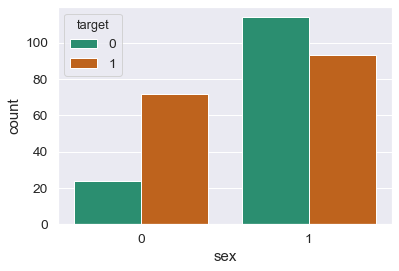

In [19]:
# Heart disease by sex in our dataset

by_sex = sns.countplot(data=df,x="sex",hue="target")
sex_labels = ['Female','Male']
target_labels = {0:"Heart Disease", 1:"Healthy"}

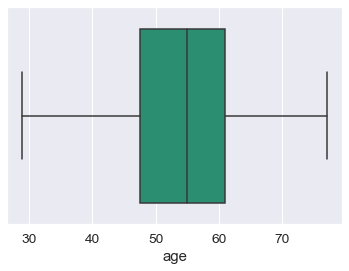

In [20]:
# Box plot of age

age_box = sns.boxplot(df['age'])

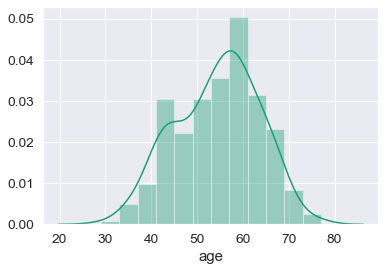

In [21]:
# Histogram of age

age_hist = sns.distplot(df['age'])

Text(0.5, 1.0, 'Distribution of Ages')

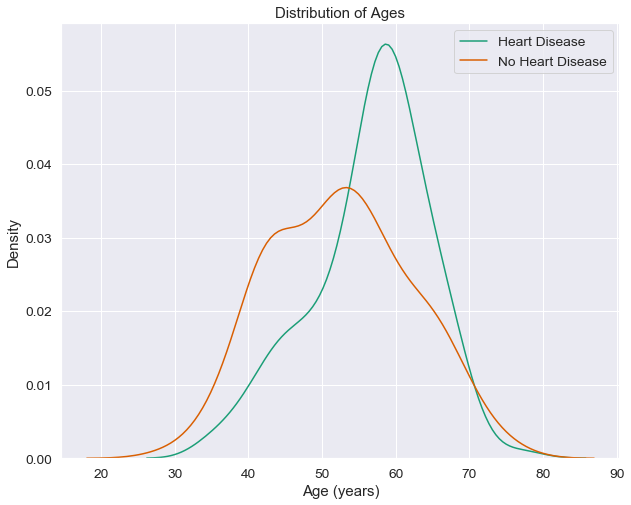

In [22]:
plt.figure(figsize = (10, 8))
sns.kdeplot(df.loc[df['target'] == 0, 'age'], label = 'Heart Disease')
sns.kdeplot(df.loc[df['target'] == 1, 'age'], label = 'No Heart Disease')
# Labeling of plot
plt.xlabel('Age (years)'); plt.ylabel('Density'); plt.title('Distribution of Ages')

In [25]:
correlations = df.corr()

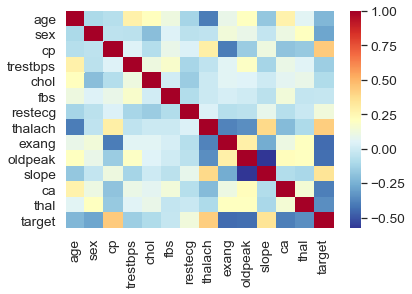

In [27]:
sns.heatmap(correlations,cmap=plt.cm.RdYlBu_r)

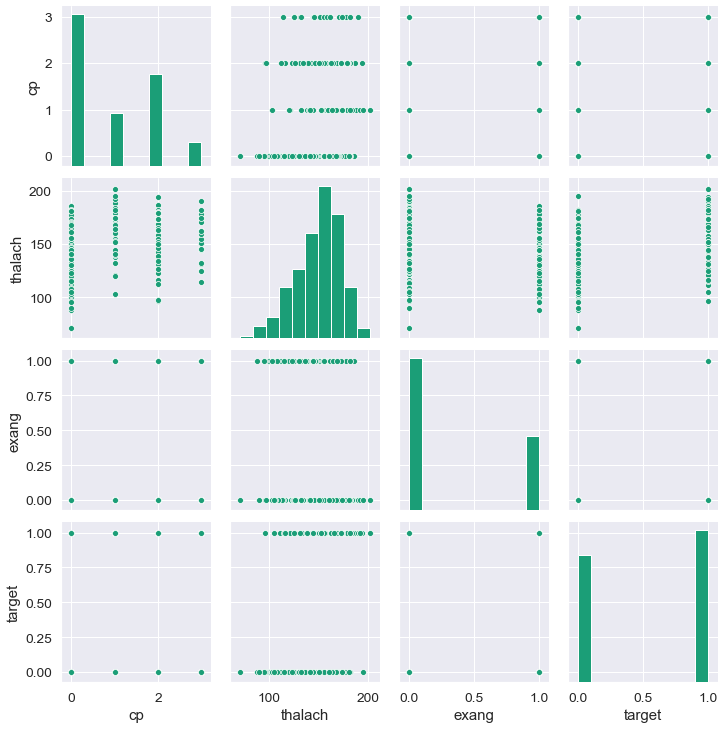

In [42]:
reduced_df = df[['cp','thalach','exang', 'target']]

sns.pairplot(data=reduced_df)